# NLP PROJECT

## Notebook III: Sentimental Analysis:


- Input: **Corpus** - We're using the corpus because order matters.
- NLP Library: **TextBlob (based on nltk)** - We use rules-based sentiment scores.
- Output: **Sentiment Score** - For each book's entire reviews (30 per book), we'll get a sentiment score (how positive/negative) and a subjectivity score (how opinionated)
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

### Sentiment of Reviews:

In [1]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

# Standard plotly imports
# import plotly.plotly as py
# import plotly.graph_objs as go
# from plotly.offline import iplot, init_notebook_mode
# # Using plotly + cufflinks in offline mode
# import cufflinks
# cufflinks.go_offline(connected=True)
# init_notebook_mode(connected=True)

data = pd.read_pickle('corpus.pkl')
data

,reviews,Book Name
AF,"\n\nTaleb seems constitutionally angry, dismis...",Antifragile
BoP,"\n\nAphorisms Galore!If for any literary fan, ...",Bed of Procrustes
FbR,"\n\nYeah, you see. I’ve just checked and most ...",Fooled by Randomness
SitG,\n\nSkin in the Game is at the same time thoug...,Skin in the Game
TBS,\n\nThis is a book that raises a number of ver...,The Black Swan


In [2]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['reviews'].apply(pol)
data['subjectivity'] = data['reviews'].apply(sub)
data

,reviews,Book Name,polarity,subjectivity
AF,"\n\nTaleb seems constitutionally angry, dismis...",Antifragile,0.073900,0.473280
BoP,"\n\nAphorisms Galore!If for any literary fan, ...",Bed of Procrustes,0.112661,0.503444
FbR,"\n\nYeah, you see. I’ve just checked and most ...",Fooled by Randomness,0.120374,0.510264
SitG,\n\nSkin in the Game is at the same time thoug...,Skin in the Game,0.072629,0.482828
TBS,\n\nThis is a book that raises a number of ver...,The Black Swan,0.081900,0.499882


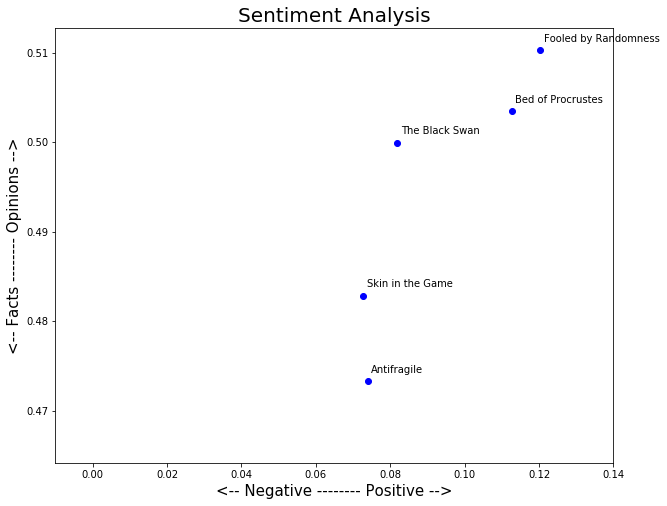

In [4]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, book_reviews in enumerate(data.index):
    x = data.polarity.loc[book_reviews]
    y = data.subjectivity.loc[book_reviews]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['Book Name'][index], fontsize=10)
    plt.xlim(-.01, 0.14) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

#### Findings:

- On one hand, the polarity for Skin in the Game and Antifragile reviews are more neutral than Fooled by Randomness and The Bed of Procrustes reviews, which seem to be the most positive ones. The Black Swan is in the middle.
- On the other hand, the subjectivity for The Black Swan, The Bed of Procrustes and Fooled by Randomness are way more opinionated than Skin in the Game and Antifragile reviews.

The sentiment analysis might also make more sense by focusing on reviews of a single book one by one.

## END OF NOTEBOOK III